Best parameters found: {}
Accuracy: 0.525


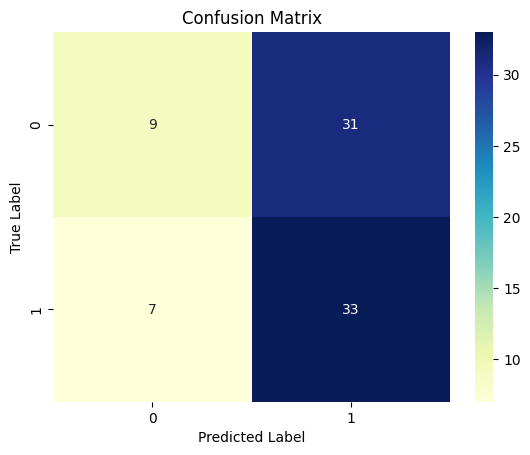

Precision: 0.515625
Recall: 0.825


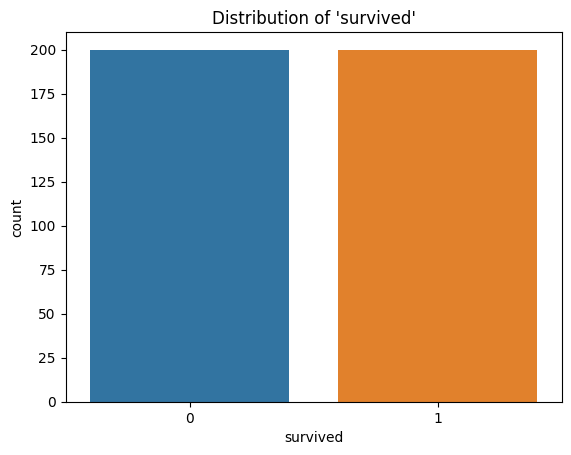

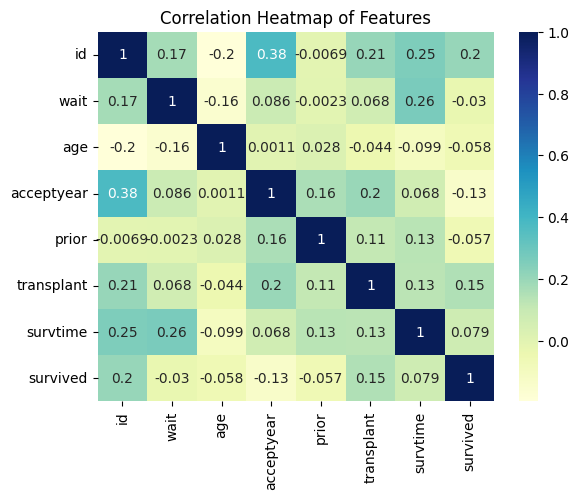

<Axes: xlabel='age'>

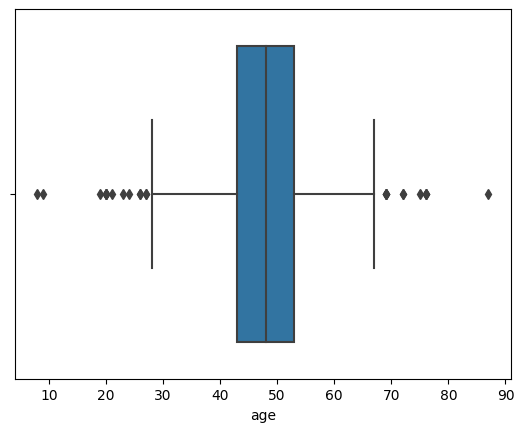

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
# data = pd.read_csv("C:\\Users\\gashm\\OneDrive\\Desktop\\Machine Learning CS 584\\data.csv", encoding='utf-8')

data = pd.read_csv("output.csv", encoding='utf-8')
data = data.drop(columns = ['Unnamed: 0'])

# Select features and target variable
X = data.drop(['survived'], axis=1)
y = data['survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters to tune
parameters = {}

# Perform grid search cross-validation
naive_bayes = GaussianNB()
clf = GridSearchCV(naive_bayes, parameters, cv=5)
clf.fit(X_train, y_train)

# Print best hyperparameters found
print("Best parameters found:", clf.best_params_)

# Train Naive Bayes classifier with best hyperparameters
naive_bayes = GaussianNB(**clf.best_params_)
naive_bayes.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = naive_bayes.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)

# Distribution of 'survived' target variable
sns.countplot(data=data, x='survived')
plt.title("Distribution of 'survived'")
plt.show()

# Correlation heatmap of features
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap of Features")
plt.show()

# Boxplot of 'age' feature
sns.boxplot(data=data, x="age")
